# Лабораторная работа №2
## Линейная нейронная сеть. Правило обучения Уидроу-Хоффа
### Варант 8

Целью работы является исследование свойств линейной нейронной сети и алгоритмов ее
обучения, применение сети в задачах аппроксимации и фильтрации.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Создам линейную нейросетевую модель из одного Dence-слоя. Функцией ошибки буду использовать MSE.

In [2]:
D = 4

model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim=D, activation='linear',
                                 kernel_initializer=keras.initializers.RandomNormal(stddev=0.5,mean=0.0),
                                 bias_initializer=keras.initializers.Zeros()))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Задам функцию для предсказания. В качестве признаков будет D значений функции. Аргументы для них заданы на отрезке с конкретным шагом.

In [3]:
t = tf.constant(np.arange(1, 6, 0.025))

def f(t):
    return np.sin(t**2-10*t+3)

X = tf.constant([f(t[i:i+D]) for i in range(len(t)-D)])
y = tf.constant(f(t[D:]))

Обучу модель

In [4]:
epochs = 20
hist = model.fit(X, y, batch_size=1, epochs=epochs)

Epoch 1/20
196/196 [==============================] - 3s 4ms/step - loss: 0.0138 - mae: 0.0896
Epoch 2/20
196/196 [==============================] - 1s 4ms/step - loss: 0.0116 - mae: 0.0807
Epoch 3/20
196/196 [==============================] - 1s 4ms/step - loss: 0.0095 - mae: 0.0739
Epoch 4/20
196/196 [==============================] - 1s 5ms/step - loss: 0.0081 - mae: 0.0681
Epoch 5/20
196/196 [==============================] - 1s 4ms/step - loss: 0.0067 - mae: 0.0616
Epoch 6/20
196/196 [==============================] - 1s 4ms/step - loss: 0.0055 - mae: 0.0556
Epoch 7/20
196/196 [==============================] - 1s 4ms/step - loss: 0.0045 - mae: 0.0505
Epoch 8/20
196/196 [==============================] - 1s 4ms/step - loss: 0.0037 - mae: 0.0457
Epoch 9/20
196/196 [==============================] - 1s 4ms/step - loss: 0.0029 - mae: 0.0406
Epoch 10/20
196/196 [==============================] - 1s 8ms/step - loss: 0.0023 - mae: 0.0359
Epoch 11/20
196/196 [============================

Отрисую результат.

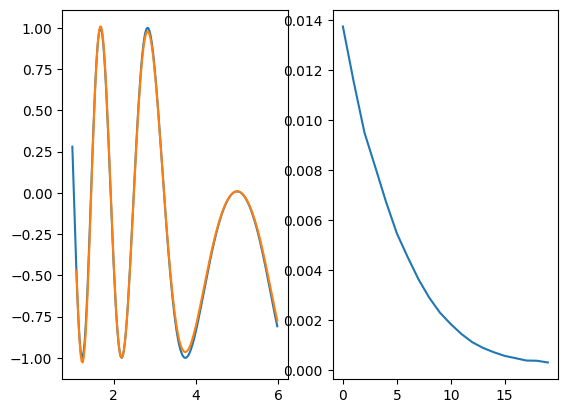

In [5]:
predictions = model(X)

fig, ax = plt.subplots(1, 2)
ax[0].plot(t, f(t))
ax[0].plot(t[D:], predictions[:,0])

ax[1].plot(hist.history['loss'])

plt.show()

## Часть 2

Обучу линейную модель восстанавливать зашумленный сигнал.

In [6]:
D = 4

model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim=D, activation='linear',
                                 kernel_initializer=keras.initializers.RandomNormal(stddev=0.5,mean=0.0),
                                 bias_initializer=keras.initializers.Zeros()))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [7]:
def noised_f(t):
    return np.sin(-2*t**2+7*t)
def f(t):
    return (1/8)*np.sin(-2*t**2+7*t-np.pi)

t = tf.constant(np.arange(0, 3.5, 0.01))

x = tf.constant([noised_f(t[i:i+D]) for i in range(len(t)-D)])
y = tf.constant(f(t[D:]))

In [8]:
epochs = 30
hist = model.fit(x, y, batch_size=1, epochs=epochs)

Epoch 1/30
346/346 [==============================] - 2s 4ms/step - loss: 0.1851 - mae: 0.3504
Epoch 2/30
346/346 [==============================] - 2s 5ms/step - loss: 0.0143 - mae: 0.0907
Epoch 3/30
346/346 [==============================] - 3s 8ms/step - loss: 0.0070 - mae: 0.0644
Epoch 4/30
346/346 [==============================] - 2s 5ms/step - loss: 0.0064 - mae: 0.0626
Epoch 5/30
346/346 [==============================] - 2s 6ms/step - loss: 0.0063 - mae: 0.0619
Epoch 6/30
346/346 [==============================] - 2s 5ms/step - loss: 0.0062 - mae: 0.0612
Epoch 7/30
346/346 [==============================] - 1s 4ms/step - loss: 0.0060 - mae: 0.0606
Epoch 8/30
346/346 [==============================] - 1s 4ms/step - loss: 0.0059 - mae: 0.0597
Epoch 9/30
346/346 [==============================] - 1s 4ms/step - loss: 0.0056 - mae: 0.0585
Epoch 10/30
346/346 [==============================] - 1s 4ms/step - loss: 0.0054 - mae: 0.0576
Epoch 11/30
346/346 [============================

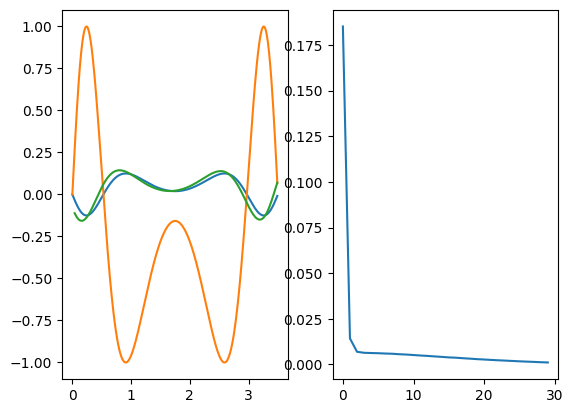

In [9]:
predictions = model(x)

fig, ax = plt.subplots(1, 2)
ax[0].plot(t, f(t))
ax[0].plot(t, noised_f(t))
ax[0].plot(t[D:], predictions[:,0])

ax[1].plot(hist.history['loss'])

plt.show()

__Выоды__: в ходе выполнения лабораторной работы, я использовал линейную нейросетевую модель для аппроксимирования функции путем предсказания следующего значения по предыдущим, а также использовал модель в качестве адаптивного фильтра для восстановления зашумленного сигнала.